In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
csv_path = "Dataset/placementdata.csv"
df = pd.read_csv(csv_path)

df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df.drop("StudentID", axis=1, inplace=True)

In [6]:
FEATURE_COLUMNS = [
    "CGPA",
    "Internships",
    "Projects",
    "Workshops/Certifications",
    "AptitudeTestScore",
    "SoftSkillsRating",
    "ExtracurricularActivities",
    "PlacementTraining",
    "SSC_Marks",
    "HSC_Marks"
]

TARGET_COLUMN = "PlacementStatus"

In [7]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

df.fillna(0, inplace=True)

In [8]:
X = df[FEATURE_COLUMNS]
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

accuracies = {}
trained_models = {}
reports = {}


In [11]:
for name, model in models.items():
    print(f"Model: {name}")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    trained_models[name] = model

    print(f"Accuracy: {acc:.4f}")

    report = classification_report(y_test, y_pred, output_dict=True)
    reports[name] = report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
Accuracy: 0.7937

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1753
           1       0.75      0.76      0.75      1247

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000

Model: Decision Tree
Accuracy: 0.7100

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1753
           1       0.64      0.69      0.66      1247

    accuracy                           0.71      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.71      0.71      0.71      3000

Model: Random Forest
Accuracy: 0.7793

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1753
           1       0.75      0.71      0.73  

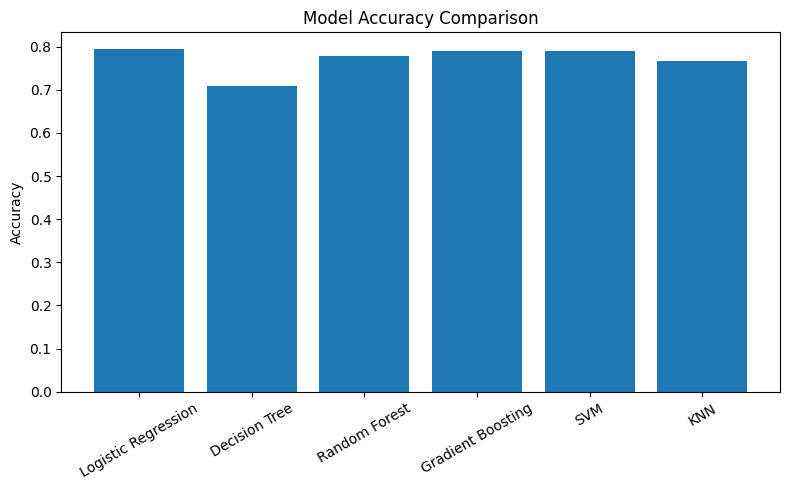

In [12]:
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values())
plt.xticks(rotation=30)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()


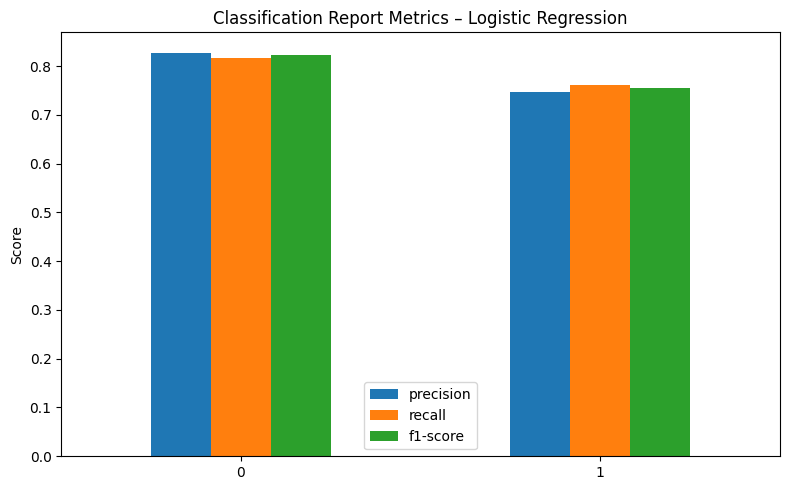

Best Model: Logistic Regression


In [13]:
best_model_name = max(accuracies, key=accuracies.get)
best_report = reports[best_model_name]

metrics_df = pd.DataFrame(best_report).transpose().iloc[:-3][["precision", "recall", "f1-score"]]

metrics_df.plot(kind="bar", figsize=(8,5))
plt.title(f"Classification Report Metrics – {best_model_name}")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Best Model:", best_model_name)


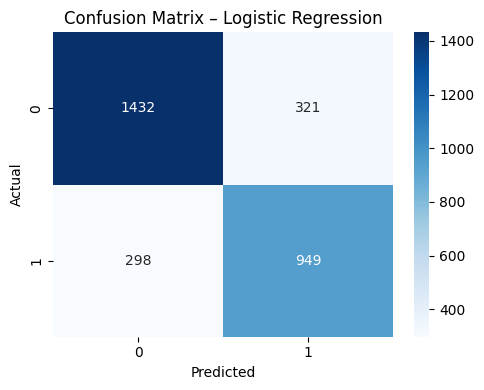

In [14]:
best_model = trained_models[best_model_name]
cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix – {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

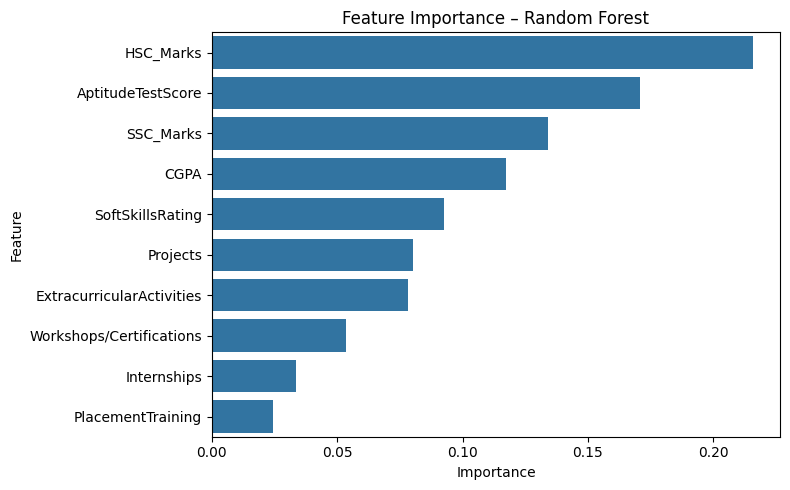

In [15]:
rf_model = trained_models["Random Forest"]
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": FEATURE_COLUMNS,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance – Random Forest")
plt.tight_layout()
plt.show()


In [16]:
os.makedirs("model", exist_ok=True)
joblib.dump(best_model, "model/placement_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(FEATURE_COLUMNS, "model/feature_columns.pkl")

['model/feature_columns.pkl']